In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from dataImporter import *
from dataProcesser import *
from events import sim_events, list_of_params, ic_params
from functions import perform_chisq
from scipy.stats import chi2
from event_processing import *
import pickle
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)

giunti_contour_cl90 = pd.read_csv('./data/giunti_cl90.csv',header=None, names=['s24','dm41']).sort_values('dm41')
IC_contour_cl90 = pd.read_csv('./data/ic_cl90.csv',header=None, names=['s24','dm41']).sort_values('dm41')
giunti_contour_cl99 = pd.read_csv('./data/giunti_cl99.csv',header=None, names=['s24','dm41']).sort_values('dm41')
IC_contour_cl99 = pd.read_csv('./data/ic_cl99.csv',header=None, names=['s24','dm41']).sort_values('dm41')
ic_34_cl90 = pd.read_csv('./data/ic_34_cl90.csv',header=None, names=['s24','s34']).sort_values('s34')
ic_34_cl99 = pd.read_csv('./data/ic_34_cl99.csv',header=None, names=['s24','s34']).sort_values('s34')

In [3]:
ndim = 4
N = 13
alpha = 0.99
precomputed_events = True

dm41_range = np.logspace(-1,0,20)  #N=13 np.logspace(-1,0,20)  #N=9 np.logspace(-1,1,20) N=21 np.logspace(-1,1,10)
s24_range =  np.logspace(-2,np.log10(0.2),30)  #N=13 np.logspace(-2,np.log10(0.2),30) #N=9 #np.logspace(-2,0,20) N=21 np.logspace(-2,0,10)
s34_range = 2*s24_range

param_list = list_of_params(ic_params, dm41_range, s24_range,s34_range=None,s24_eq_s34=False, s24_2x_s24=True)
#for p in param_list: # Assert all dicts returned from param_list have precomputed probs.
#    assert is_precomputed(N=N,ndim=ndim, dict=p,check=False)
param_list = return_precomputed(N,ndim,params=param_list)
dm41_range = np.sort(np.unique(np.array([p['dm_41'] for p in param_list])))
s24_range = np.sin(2*np.sort(np.unique(np.array([p['theta_24'] for p in param_list]))))**2
s34_range = np.sin(2*np.sort(np.unique(np.array([p['theta_34'] for p in param_list]))))**2
print(dm41_range)
print(s24_range)
print(s34_range)

{'theta_12': 0.5837630475986898, 'theta_13': 0.15494769630192953, 'theta_23': 0.7695841386786632, 'theta_34': 0.1001674211615598, 'theta_24': 0.0500837105807799, 'theta_14': 0, 'delta_ij': 3.4033920413889422, 'dm_21': 7.53e-05, 'dm_31': 0.0025153, 'dm_41': 0.1} {'theta_12': 0.5837630475986898, 'theta_13': 0.15494769630192953, 'theta_23': 0.7695841386786632, 'theta_34': 0.10549634885696031, 'theta_24': 0.052748174428480156, 'theta_14': 0, 'delta_ij': 3.4033920413889422, 'dm_21': 7.53e-05, 'dm_31': 0.0025153, 'dm_41': 0.5455594781168519}
[]
[]
[]


In [2]:
param_list[419]

NameError: name 'param_list' is not defined

In [6]:
s_24_pmt = sim_events(alpha, N,param_list[419], False,False, [False, np.median(Ereco), 0], tau=True)
s_24 = sim_events(alpha, N,param_list[419], False,False, [False, np.median(Ereco), 0], tau=False)

In [8]:
s_34_pmt = sim_events(alpha, N,param_list[419], False,False, [False, np.median(Ereco), 0], tau=True)
s_34 = sim_events(alpha, N,param_list[419], False,False, [False, np.median(Ereco), 0], tau=False)

In [9]:
s_24_pmt/s_24

array([[1.00235004, 1.00233592, 1.00230709, 1.00233879, 1.00234902, 1.00235783, 1.00234809, 1.00235634, 1.00234254, 1.00232343, 1.00229363, 1.0022717 , 1.00225838, 1.00221984, 1.00220356,
        1.00218587, 1.00215664, 1.0021257 , 1.00209447, 1.00205796],
       [1.00127854, 1.00127055, 1.00125063, 1.00125646, 1.00125926, 1.00126657, 1.00126406, 1.0012607 , 1.00125351, 1.00124889, 1.00123436, 1.00122894, 1.00121246, 1.00119956, 1.00118529,
        1.00117229, 1.00115591, 1.00114004, 1.00112719, 1.00110673],
       [1.00065078, 1.0006526 , 1.00064378, 1.00063056, 1.00063239, 1.00063049, 1.00063112, 1.00062694, 1.00062783, 1.00062105, 1.00061629, 1.00061369, 1.00060297, 1.00059943, 1.0005938 ,
        1.00058286, 1.00057757, 1.00056589, 1.00056305, 1.00055229],
       [1.00031131, 1.00031954, 1.00031698, 1.00030871, 1.00030774, 1.00030448, 1.00030376, 1.00030034, 1.00030092, 1.00029876, 1.00029617, 1.00029271, 1.00028878, 1.00028827, 1.00028525,
        1.00028107, 1.00027644, 1.0002724

In [10]:
s_34_pmt/s_34

array([[1.06818132, 1.04697438, 1.02743794, 1.0144033 , 1.01254553, 1.01161773, 1.01064198, 1.00998618, 1.00922904, 1.0083832 , 1.00751687, 1.00648076, 1.00558827, 1.00487962, 1.00434915,
        1.00386905, 1.00341296, 1.00308208, 1.00274193, 1.00256856],
       [1.09442024, 1.06122265, 1.03355447, 1.01529989, 1.01261241, 1.01124377, 1.01001384, 1.00907254, 1.00823995, 1.00735411, 1.00637377, 1.00531594, 1.00442419, 1.00375006, 1.00330226,
        1.00281525, 1.0024225 , 1.00207351, 1.0017835 , 1.00169808],
       [1.14424589, 1.09358585, 1.05111581, 1.02086488, 1.01551674, 1.0126703 , 1.01057853, 1.00909605, 1.00798774, 1.00702839, 1.00592272, 1.00475797, 1.00394806, 1.00325962, 1.00279408,
        1.0023593 , 1.00191945, 1.00150667, 1.00131894, 1.00128388],
       [1.18778241, 1.1333384 , 1.07987881, 1.03380221, 1.02373173, 1.01773583, 1.01341563, 1.01041595, 1.00852733, 1.00714768, 1.00580991, 1.00443854, 1.00367386, 1.00299106, 1.00243666,
        1.00192304, 1.00143799, 1.0011368

In [11]:
s_34_pmt/s_24

array([[1.02454499, 1.01850649, 1.00785256, 1.00151688, 1.00237502, 1.00320374, 1.00415382, 1.00499095, 1.00560021, 1.00597055, 1.00583905, 1.00539158, 1.00494143, 1.00449038, 1.00400197,
        1.00363852, 1.003367  , 1.0028945 , 1.00264272, 1.00250188],
       [1.04554344, 1.03015866, 1.0130271 , 1.00291079, 1.00302796, 1.00351674, 1.00404666, 1.00466675, 1.00520514, 1.00531034, 1.00494635, 1.00442936, 1.00396854, 1.00359769, 1.00309433,
        1.00273319, 1.00229584, 1.0019965 , 1.00179287, 1.00163912],
       [1.09308978, 1.06299016, 1.03154108, 1.00956219, 1.00692406, 1.00645853, 1.00583234, 1.00562906, 1.00582211, 1.00567122, 1.00513472, 1.00425095, 1.00392562, 1.00319134, 1.00263016,
        1.00258603, 1.0018397 , 1.00145697, 1.00122185, 1.00127016],
       [1.14797096, 1.11108062, 1.06615493, 1.02569157, 1.0185669 , 1.01426543, 1.01103483, 1.00909927, 1.00772936, 1.00648719, 1.00555291, 1.00463608, 1.00389126, 1.00317883, 1.00253487,
        1.00174655, 1.00151216, 1.0011668

In [16]:
if not precomputed_events:
    p = Pool()
    data = [(alpha, N,p, False,False, [False, np.median(Ereco), 0]) for p in param_list]
    H1_events_list = p.starmap(sim_events, data)
    p.close()
    H0_events = sim_events(alpha=alpha,npoints=N,params=param_list[0], null=True, multi=False, spectral_shift=[False, np.median(Ereco), 0])
    
    if len(s34_range) > 1:
        pickle.dump(H1_events_list,open(f'./pre_computed/H1_34_N{N}_{len(dm41_range)}x{len(s24_range)}x{len(s34_range)}_notau.p','wb'))
    else:
        pickle.dump(H1_events_list,open(f'./pre_computed/H1_no34_N{N}_{len(dm41_range)}x{len(s24_range)}_notau.p','wb'))
    pickle.dump(H0_events,open(f'./pre_computed/H0_N{N}.p','wb'))
    

if len(s34_range) > 1:
    H1_events_list = pickle.load(open(f'./pre_computed/H1_34_N{N}_{len(dm41_range)}x{len(s24_range)}x{len(s34_range)}_notau.p','rb'))
else:
    H1_events_list = pickle.load(open(f'./pre_computed/H1_no34_N{N}_{len(dm41_range)}x{len(s24_range)}_notau.p','rb'))
H0_events = pickle.load(open(f'./pre_computed/H0_N{N}.p','rb'))


gamma = 0.3
delta_T = (np.sum(sim_events(alpha=alpha,npoints=N,params=param_list[0], null=True, multi=False, spectral_shift=[True, np.median(Ereco), gamma])) - np.sum(H0_events))/np.sum(H0_events)

H0_normalized, H1_list_normalized = normalize_events(H0_events,H1_events_list,z_bins)

In [17]:
sigma_a = 0.4
sigma_b = 0.1
f = 0.13
s24_cl90, s24_cl99, dm41_cl90, dm41_cl99 = get_contour(H1_list_normalized, dm41_range,s24_range,delta_T,[sigma_a,sigma_b],f,x0=[1,0,0])

In [18]:
#s24_cl90_tau_s24, s24_cl99_tau_s24, dm41_cl90_tau_s24, dm41_cl99_tau_s24= s24_cl90, s24_cl99, dm41_cl90, dm41_cl99
#s24_cl90_notau_s34, s24_cl99_notau_s34, dm41_cl90_notau_s34, dm41_cl99_notau_s34= s24_cl90, s24_cl99, dm41_cl90, dm41_cl99
s24_cl90_notau_s24, s24_cl99_notau_s24, dm41_cl90_notau_s24, dm41_cl99_notau_s24= s24_cl90, s24_cl99, dm41_cl90, dm41_cl99

Text(0.05, 0.65, '$\\pi_N = 0.4$\n$\\pi_\\theta = 0.1$\n$\\Delta \\gamma = 0.3$\n$f = 0.13$\n')

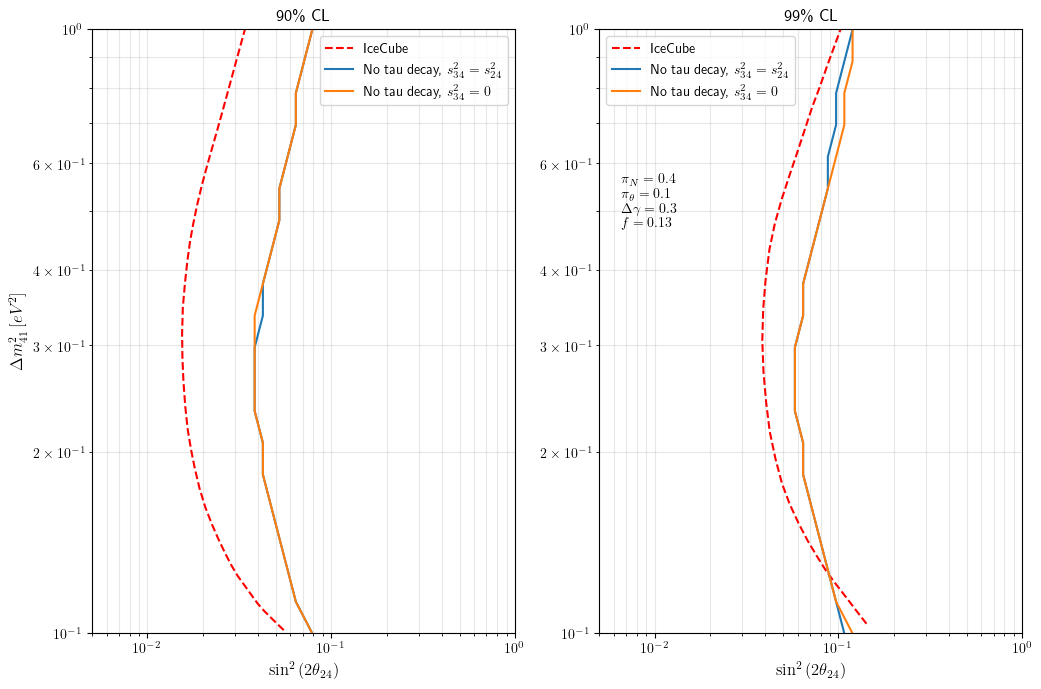

In [19]:
fig,ax = plt.subplots(1,2,figsize=(12,8))

#ax[0].plot(giunti_contour_cl90.s24, giunti_contour_cl90.dm41, label='Giunti et al. (90% CL)',c='b')
ax[0].plot(IC_contour_cl90.s24, IC_contour_cl90.dm41, label='IceCube',c='red',ls='--')
ax[0].plot(s24_cl90_notau_s34, dm41_cl90_notau_s34, label='No tau decay, $s_{34}^2=s_{24}^2$ ')
ax[0].plot(s24_cl90_notau_s24, dm41_cl90_notau_s24, label='No tau decay, $s_{34}^2=0$ ')

#ax[1].plot(giunti_contour_cl99.s24, giunti_contour_cl99.dm41, label='Giunti et al. (99% CL)',ls='solid',c='b')
ax[1].plot(IC_contour_cl99.s24, IC_contour_cl99.dm41, label='IceCube',c='red',ls='--')
ax[1].plot(s24_cl99_notau_s34, dm41_cl99_notau_s34, label='No tau decay, $s_{34}^2=s_{24}^2$')
ax[1].plot(s24_cl99_notau_s24, dm41_cl99_notau_s24, label='No tau decay, $s_{34}^2=0$')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlim((5e-3, 1))
ax[1].set_xlim((5e-3, 1))
ax[0].set_ylim((1e-1,1))
ax[1].set_ylim((1e-1,1))
ax[0].set_xlabel('$\sin^2{(2\\theta_{24})}$', fontsize=12)
ax[1].set_xlabel('$\sin^2{(2\\theta_{24})}$', fontsize=12)
ax[0].set_ylabel('$\\Delta m^2_{41} \, [eV^2]$', fontsize=12)
ax[0].grid(True, which='both', alpha=0.3)
ax[1].grid(True, which='both', alpha=0.3)
ax[0].set_title('90\% CL')
ax[1].set_title('99\% CL')

ax[0].legend()
ax[1].legend()
plt.annotate(f'$\pi_N = {sigma_a}$\n$\pi_\\theta = {sigma_b}$\n$\Delta \gamma = {gamma}$\n$f = {f}$\n', 
        xy=(0.05, 0.65), xycoords='axes fraction')

In [14]:
# Plots for Smirnov 2013
from plotter import P_over_E_parameter
temp_params = list_of_params(ic_params, np.array([0.2,0.5,1.]), np.array([0.1]), np.array([0.1]))
Pam = P_over_E_parameter('m', param_dict_list=temp_params, E_range=np.logspace(3,4,50), theta_i = np.pi - np.arccos(-1), ndim = 4, anti=True)
Pm = P_over_E_parameter('m', param_dict_list=temp_params, E_range=np.logspace(3,4,50), theta_i = np.pi - np.arccos(-1), ndim = 4, anti=False)
Pe = P_over_E_parameter('e', param_dict_list=temp_params, E_range=np.logspace(3,4,50), theta_i = np.pi - np.arccos(-1), ndim = 4, anti=False)
Pae = P_over_E_parameter('e', param_dict_list=temp_params, E_range=np.logspace(3,4,50), theta_i = np.pi - np.arccos(-1), ndim = 4, anti=True)

Pamam = Pam[:,1]
Pamat = Pam[:,2]
Pmm = Pm[:,1]
Pmt = Pm[:,2]
Pem = Pe[:,1]
Paeam = Pae[:,1]

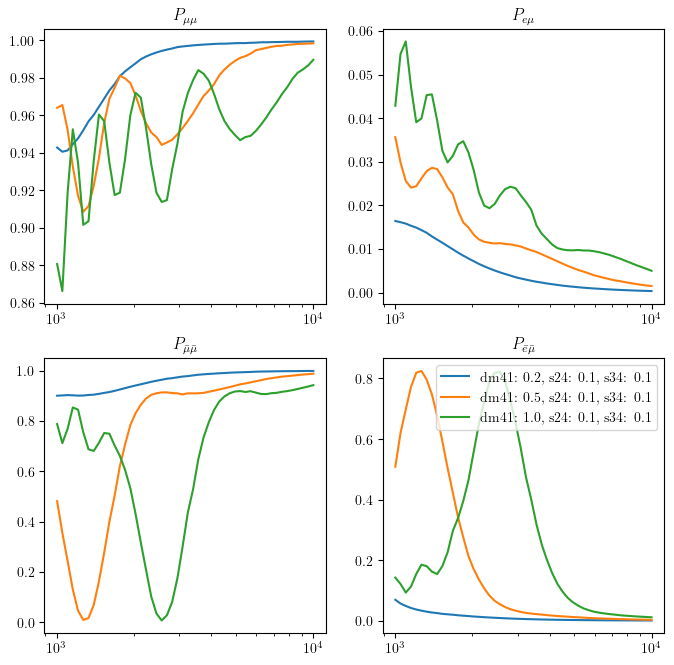

In [15]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax = ax.flatten()
for i,prob in enumerate(Pmm):
    ax[0].plot(np.logspace(3,4,50), prob, label=f'dm41: {np.round(temp_params[i]["dm_41"],2)}, s24: {np.round(np.sin(2*temp_params[i]["theta_24"])**2,2)}, s34: {np.round(np.sin(2*temp_params[i]["theta_34"])**2,2)}')
for i,prob in enumerate(Pmt):
    ax[1].plot(np.logspace(3,4,50), prob, label=f'dm41: {np.round(temp_params[i]["dm_41"],2)}, s24: {np.round(np.sin(2*temp_params[i]["theta_24"])**2,2)}, s34: {np.round(np.sin(2*temp_params[i]["theta_34"])**2,2)}')
for i,prob in enumerate(Pamam):
    ax[2].plot(np.logspace(3,4,50), prob, label=f'dm41: {np.round(temp_params[i]["dm_41"],2)}, s24: {np.round(np.sin(2*temp_params[i]["theta_24"])**2,2)}, s34: {np.round(np.sin(2*temp_params[i]["theta_34"])**2,2)}')
for i,prob in enumerate(Pamat):
    ax[3].plot(np.logspace(3,4,50), prob, label=f'dm41: {np.round(temp_params[i]["dm_41"],2)}, s24: {np.round(np.sin(2*temp_params[i]["theta_24"])**2,2)}, s34: {np.round(np.sin(2*temp_params[i]["theta_34"])**2,2)}')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')

ax[0].set_title('$P_{\mu\mu}$')
ax[1].set_title('$P_{e\mu}$')
ax[2].set_title('$P_{\\bar{\mu}\\bar{\mu}}$')
ax[3].set_title('$P_{\\bar{e}\\bar{\mu}}$')
plt.legend()

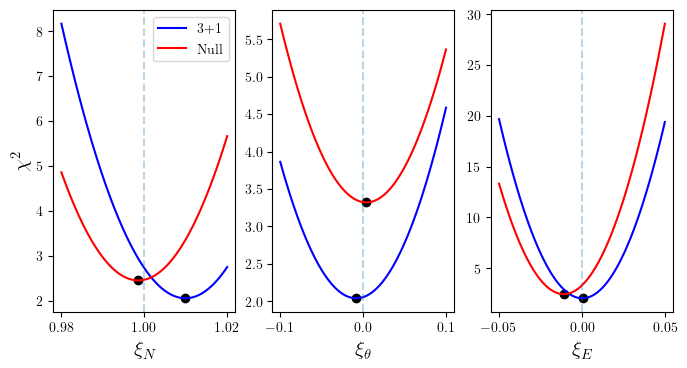

In [469]:
from functions import chisq
fig, ax = plt.subplots(1,3)
c_range = np.linspace(-0.05,0.05,100)
b_range = np.linspace(-0.1,0.1,100)
a_range = np.linspace(0.98,1.02,100)
H1_a = [chisq(params =[a,best_a[1]] ,events=best_fit_events, data=IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g) for a in a_range]
H0_a = [chisq(params =[a,best_a[1]] ,events=H0_normalized, data=IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g) for a in a_range]
H0_min_a = np.argmin(H0_a)
H1_min_a = np.argmin(H1_a)
ax[0].plot(a_range, H1_a, label='3+1', c='blue')
ax[0].plot(a_range, H0_a, label='Null', c='red')
ax[0].scatter(a_range[H0_min_a], H0_a[H0_min_a], c='black')
ax[0].set_xlabel('$\\xi_N$', fontsize=15)
ax[0].set_ylabel('$\chi^2$', fontsize=15)
ax[0].scatter(a_range[H1_min_a], H1_a[H1_min_a], c='black')
ax[0].legend()
ax[0].axvline(x=1, linestyle='--',alpha=0.3)


H1_b = [chisq(params =np.array([best_a[0],b]) ,events=best_fit_events, data=IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g) for b in b_range]
H0_b = [chisq(params =np.array([best_a[0],b]) ,events=H0_normalized, data=IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g) for b in b_range]
H0_min_b = np.argmin(H0_b)
H1_min_b = np.argmin(H1_b)
ax[1].plot(b_range, H1_b, label='3+1', c='blue')
ax[1].plot(b_range, H0_b, label='Null', c='red')
ax[1].scatter(b_range[H0_min_b], H0_b[H0_min_b], c='black')
ax[1].set_xlabel('$\\xi_\\theta$', fontsize=15)
ax[1].scatter(b_range[H1_min_b], H1_b[H1_min_b], c='black')
ax[1].axvline(x=0, linestyle='--',alpha=0.3)

H1_c = [chisq(params =np.array([best_a[0],best_a[1], c]) ,events=best_fit_events, data=IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g) for c in c_range]
H0_c = [chisq(params =np.array([best_a[0],best_a[1], c]) ,events=H0_normalized, data=IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g) for c in c_range]
H0_min_c = np.argmin(H0_c)
H1_min_c = np.argmin(H1_c)
ax[2].plot(c_range, H1_c, label='3+1', c='blue')
ax[2].plot(c_range, H0_c, label='Null', c='red')
ax[2].scatter(c_range[H0_min_c], H0_c[H0_min_c], c='black')
ax[2].set_xlabel('$\\xi_E$', fontsize=15)
ax[2].scatter(c_range[H1_min_c], H1_c[H1_min_c], c='black')
ax[2].axvline(x=0, linestyle='--',alpha=0.3)

In [140]:
reshaped_H1 = np.array(H1_list_normalized).reshape(7,7,7,10,11)
best_dm = np.argwhere(dm41_range==best_fit_params['dm_41']).item()
H1_best_dm = reshaped_H1[:,:,best_dm,:]
H1_list_best_dm = H1_best_dm.reshape(7*7,10,11)

In [56]:
s24_cl90_index_list=[]
s24_cl99_index_list=[]
s34_cl90_index_list=[]
s34_cl99_index_list=[]
for x in [[1,0,0]]:#[[1.],[1.,0.],[1.,0.,0.]]:
    sigma_a = 0.25
    sigma_b = 0.15
    sigma_g = delta_T
    f = 0.09
    sigma_syst = f*IC_observed
    x0=x
    #chisq_H0, a_H0 = perform_chisq(H0_normalized,IC_observed,z=zreco[0:-1],sigma_a=sigma_a,sigma_b=sigma_b,sigma_gamma=sigma_gamma , x0=x0)
    chisq_H1_list  = np.array([perform_chisq(H1_norm, IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1], sigma_a=sigma_a,sigma_b=sigma_b,sigma_g=sigma_g, x0=x0)[0] for H1_norm in H1_list_normalized])
    delta_chi = chisq_H1_list - np.min(chisq_H1_list)#chisq_H1_list - chisq_H0

    best_fit_index = np.argmin(delta_chi)
    best_fit_params = param_list[best_fit_index]
    best_fit_events = H1_list_normalized[best_fit_index]
    _, best_a =perform_chisq(H1_list_normalized[best_fit_index], IC_observed,sigma_syst=sigma_syst,z=zreco[0:-1],sigma_a=sigma_a, sigma_b=sigma_b,sigma_g=sigma_g, x0=x0)
    p_value = chi2.sf(np.min(chisq_H1_list),2)

    if len(best_a) == 2:
        a = best_a[0]
        b = best_a[1]
        H1_best = a*(1+b*(0.5+zreco[0:-1]))*best_fit_events
    elif len(best_a) == 1:
        H1_best = best_a*best_fit_events

    '''
    print('best deltachi:', np.round(delta_chi[best_fit_index],4))
    print('best parameters:', best_a)
    #print('p-value:',p_value)
    print('best dm41:', np.round(best_fit_params['dm_41'],3))
    print('best s24:', np.round(np.sin(2*best_fit_params['theta_24'])**2,4))
    print('best s34:', np.round(np.sin(2*best_fit_params['theta_34'])**2,4))
    #print('best th24:', best_fit_params['theta_24'])
    #print(delta_chi)
    '''

    deltachi_reshaped = delta_chi.reshape(len(s24_range), len(s34_range))
    cl_99_bool = np.where(deltachi_reshaped < chi2.ppf(q = 0.99,df=2),True,False)
    cl_90_bool = np.where(deltachi_reshaped < chi2.ppf(q = 0.90,df=2),True,False)

    s24_cl90_index = get_boundary(cl_90_bool.T)
    s34_cl90_index = np.linspace(0,len(s24_cl90_index)-1,len(s24_cl90_index)).astype('int')
    s24_cl99_index = get_boundary(cl_99_bool.T)
    s34_cl99_index = np.linspace(0,len(s24_cl99_index)-1,len(s24_cl99_index)).astype('int')

    s24_cl90_index_list.append(s24_cl90_index)
    s24_cl99_index_list.append(s24_cl99_index)
    s34_cl90_index_list.append(s34_cl90_index)
    s34_cl99_index_list.append(s34_cl99_index)


Text(0.05, 0.65, '$\\pi_N = 0.25$\n$\\pi_\\theta = 0.15$\n$\\Delta \\gamma = 0.3$\n$f = 0.09$\n')

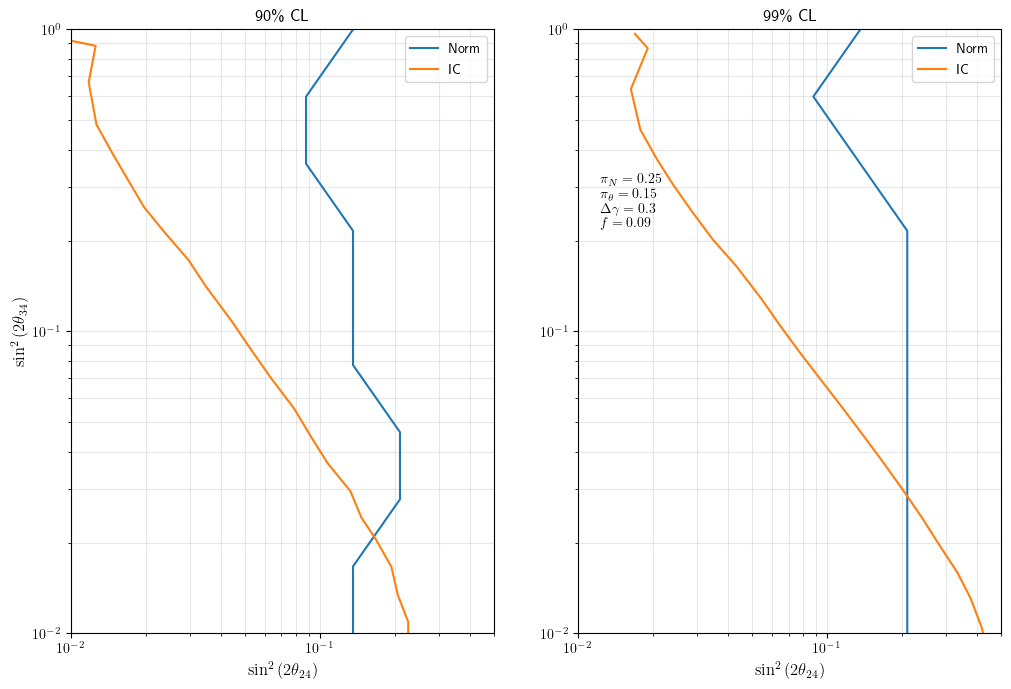

In [57]:
fig,ax = plt.subplots(1,2,figsize=(12,8))

#ax[0].plot(giunti_contour_cl90.s24, giunti_contour_cl90.dm41, label='Giunti et al. (90% CL)',c='b')
#ax[0].plot(IC_contour_cl90.s24, IC_contour_cl90.dm41, label='IceCube',c='red',ls='--')
ax[0].plot(s24_range[s24_cl90_index_list[0]], s34_range[s34_cl90_index_list[0]], label='Norm')
ax[0].plot(ic_34_cl90.s24, ic_34_cl90.s34, label='IC')
#ax[0].plot(s24_range[s24_cl90_index_list[1]], dm41_range[dm41_cl90_index_list[1]], label='Norm + zenith')
#ax[0].plot(s24_range[s24_cl90_index_list[2]], dm41_range[dm41_cl90_index_list[2]], label='Norm + zenith + tilt')

#ax[1].plot(giunti_contour_cl99.s24, giunti_contour_cl99.dm41, label='Giunti et al. (99% CL)',ls='solid',c='b')
#ax[1].plot(IC_contour_cl99.s24, IC_contour_cl99.dm41, label='IceCube',c='red',ls='--')
ax[1].plot(s24_range[s24_cl99_index_list[0]], s34_range[s34_cl99_index_list[0]], label='Norm')
ax[1].plot(ic_34_cl99.s24, ic_34_cl99.s34, label='IC')
#ax[1].plot(s24_range[s24_cl99_index_list[1]], dm41_range[dm41_cl99_index_list[1]], label='Norm + zenith')
#ax[1].plot(s24_range[s24_cl99_index_list[2]], dm41_range[dm41_cl99_index_list[2]], label='Norm + zenith + tilt')


ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlim((s24_range.min(), s24_range.max()))
ax[1].set_xlim((s24_range.min(), s24_range.max()))
ax[0].set_ylim((s34_range.min(), s34_range.max()))
ax[1].set_ylim((s34_range.min(), s34_range.max()))
ax[0].set_xlabel('$\sin^2{(2\\theta_{24})}$', fontsize=12)
ax[1].set_xlabel('$\sin^2{(2\\theta_{24})}$', fontsize=12)
ax[0].set_ylabel('$\sin^2{(2\\theta_{34})}$', fontsize=12)
ax[0].grid(True, which='both', alpha=0.3)
ax[1].grid(True, which='both', alpha=0.3)
ax[0].set_title('90\% CL')
ax[1].set_title('99\% CL')

ax[0].legend()
ax[1].legend()
plt.annotate(f'$\pi_N = {sigma_a}$\n$\pi_\\theta = {sigma_b}$\n$\Delta \gamma = {gamma}$\n$f = {f}$\n', 
        xy=(0.05, 0.65), xycoords='axes fraction')

#interpolare contour mesh